<a href="https://colab.research.google.com/github/EltonGS/BC_DS_projeto_modulo_3/blob/main/Notebooks/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análise exploratória dos dados de Santo André - SP para os casos e óbitos de Covid-19**

Os dados foram obtidos através do site [Brasil.IO](https://brasil.io/dataset/covid19/caso_full/). A planilha analisada é a **caso_full**.

O **Brasil.IO** é uma força tarefa de 40 voluntários criada para fornecer **bases de dados** com a série histórica dos **casos e óbitos de Covid-19** por município. **O objetivo é facilitar o acesso a dados já padronizados**.

**Os dados analisados nesse projeto foram obtidos na data 28/06/2021**.

Caso tenha chegado diretamente a esse notebook, [aqui](https://github.com/EltonGS/BC_DS_projeto_modulo_3) está o repositório com todo o projeto.

Os dados foram tratados anteriormente em um outro notebook que pode ser acessado [aqui](https://github.com/EltonGS/BC_DS_projeto_modulo_3/blob/main/Notebooks/tratamento_dados.ipynb).

Neste notebook buscaremos identificar a linha do tempo dos casos e óbitos de Covid-19 na cidade de **Santo André - SP**.

As **hipóteses** analisadas nesse projeto serão:

1. Os dados analisados são uma **série temporal**.
2. As **medidas de isolamento social (*lockdown*, antecipação de feriados)** mais restritivas realizadas pela prefeitura / estado reduziram o número de casos e óbitos.
3. Com o avanço da **vacinação** o número de casos e óbitos **diminuiu**.

In [1]:
#importando as bibliotecas que serão usadas
import pandas as pd # para manipulação dos dados

import matplotlib.pyplot as plt # para plotar e modificar gráficos

import seaborn as sns # para plotar gráficos

**Lendo os dados e realizando as primeiras manipulações**

A primeira hipótese a ser testada será: **1. Os dados analisados são uma série temporal?**

O que é uma **série temporal**? Segundo um artigo da **Alura**, "Uma **série temporal** é uma **sequência de pontos ordenados de forma cronológica**. Normalmente, a série temporal possui uma sequência de dados equidistantes no tempo". Fonte: [Alura](https://www.alura.com.br/artigos/series-temporais-e-suas-aplicacoes)

Os dados serão analisado de forma para identificar se temos uma **série temporal**.

In [2]:
# endereço dos dataframes que serão utilizados
# dados de covid-19 para cidade de Santo André / SP
url_sa = 'https://raw.githubusercontent.com/EltonGS/BC_DS_projeto_modulo_3/main/dados_tratados/dados_sa.csv'

In [3]:
# lendo os arquivos csv
dados_sa = pd.read_csv(url_sa)

In [4]:
# visualizando os dados de Santo André
dados_sa.head(3)

,cidade,codigo_cidade,data,semana_epidem,populacao,populacao_2019,is_last,is_repeated,casos_confirmados,casos_por_100k_habitantes,data_atualizacao,taxa_mortalidade,obitos,estado,casos_novos,obitos_novos
0,Santo André,3547809.0,2020-03-16,202012,721368.0,718773.0,False,False,1,0.13863,2020-03-16,0.0,0,SP,1,0
1,Santo André,3547809.0,2020-03-17,202012,721368.0,718773.0,False,False,1,0.13863,2020-03-17,0.0,0,SP,0,0
2,Santo André,3547809.0,2020-03-18,202012,721368.0,718773.0,False,False,6,0.83175,2020-03-18,0.0,0,SP,5,0


In [5]:
# transformando os dados da coluna data dos dataframes no formato datetime
dados_sa['data'] = pd.to_datetime(dados_sa['data'], format='%Y-%m-%d')

In [6]:
# verificando o tipo de dado na coluna data agora com o tipo datetime
dados_sa['data'].head(3)

0   2020-03-16
1   2020-03-17
2   2020-03-18
Name: data, dtype: datetime64[ns]

**Criando as primeiras visualizações utilizando os dados**

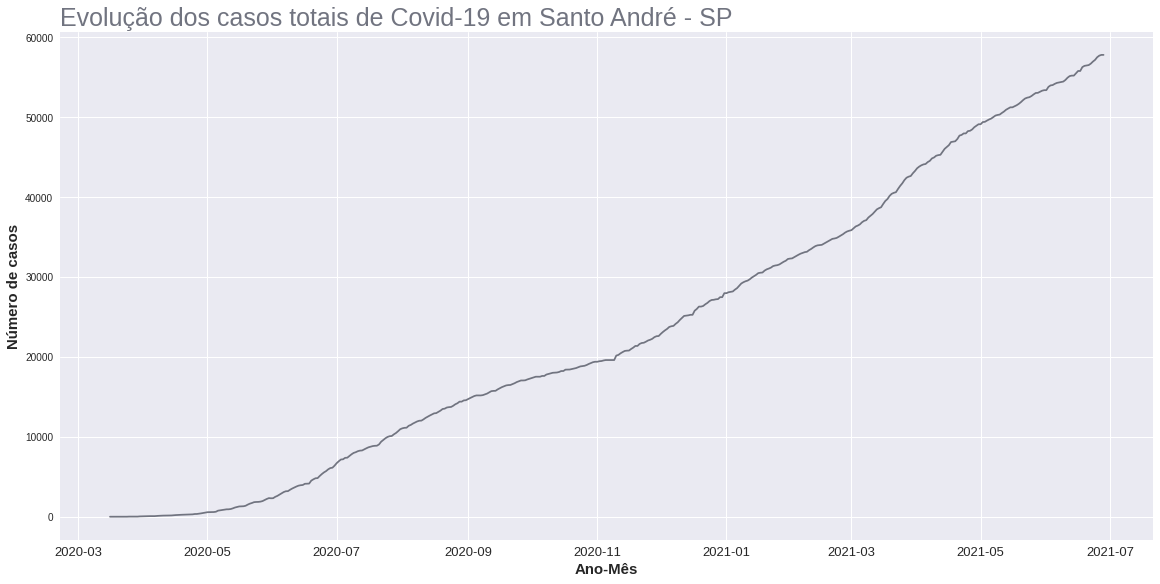

<Figure size 576x396 with 0 Axes>

In [7]:
# estilo a ser usado
plt.style.use('seaborn')

# criação da figura e eixo
fig, ax = plt.subplots(figsize=(16, 8), constrained_layout=True)

# plotando as curvas de casos identificados para a cidade de Santo André em comparação com o estado de SP
sns.lineplot(data=dados_sa, x=dados_sa['data'], y=dados_sa['casos_confirmados'], color='#717480')
plt.title('Evolução dos casos totais de Covid-19 em Santo André - SP', fontsize = 25, color='#717480', loc='left')
plt.xlabel('Ano-Mês', fontsize=15, fontweight='bold')
plt.xticks(fontsize=13)
plt.ylabel('Número de casos', fontsize=15, fontweight='bold')

# mostrando a figura
plt.show()

# exportando a figura
plt.savefig('evolucao_casos')

**Curva de crescimento no número de casos totais de Covid-19**

Acima temos a curva de crescimento dos casos de Covid-19 para a cidade de Santo André. Podemos notar algumas características de uma **curva de crescimento exponencial**, o início com um crescimento lento e logo depois um crescimento acentuado, momentos em que a curva parece tender a suavizar o aumento de casos e logo em seguida um novo aumento brusco.

Para verificar se temos uma curva de **crescimento exponencial** é possível plotar nosso dados em um gráfico onde o eixo Y está em escala logarítmica. Ao aplicarmos uma escala logarítmica em uma curva de crescimento exponencial devemos ter uma reta.

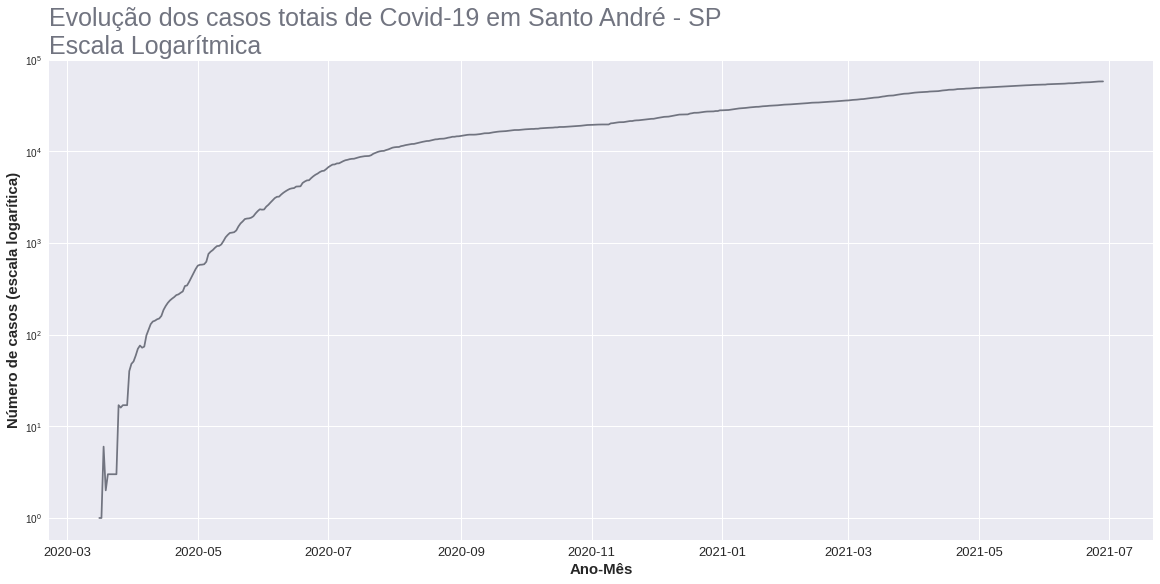

In [8]:
# criação da figura e eixos
fig, ax = plt.subplots(figsize=(16, 8), constrained_layout=True)

# plotando as curvas de casos identificados para a cidade de Santo André em comparação com o estado de SP
sns.lineplot(data=dados_sa, x=dados_sa['data'], y=dados_sa['casos_confirmados'], color='#717480')
plt.title('Evolução dos casos totais de Covid-19 em Santo André - SP\nEscala Logarítmica', fontsize = 25, color='#717480', loc='left')
plt.xlabel('Ano-Mês', fontsize=15, fontweight='bold')
plt.xticks(fontsize=13)
plt.ylabel('Número de casos (escala logarítica)', fontsize=15, fontweight='bold')

# definição da escala no eixo Y
plt.yscale('log')

# mostrando a figura
plt.show()

**Número de casos confirmados de Covid-19 em Santo André com escala logarítmica**

Nota-se que **não temos uma reta perfeita** no gráfico acima, onde o eixo Y está em escala logarítmica, mas podemos identificar alguns **segmentos de reta**. A alteração no ângulo entre esses segmentos de reta são explicados por alteração no fator exponencial ao longo do tempo. Assim, mesmo não tendo uma reta perfeita **temos um crescimento exponencial identificado no gráfico**.


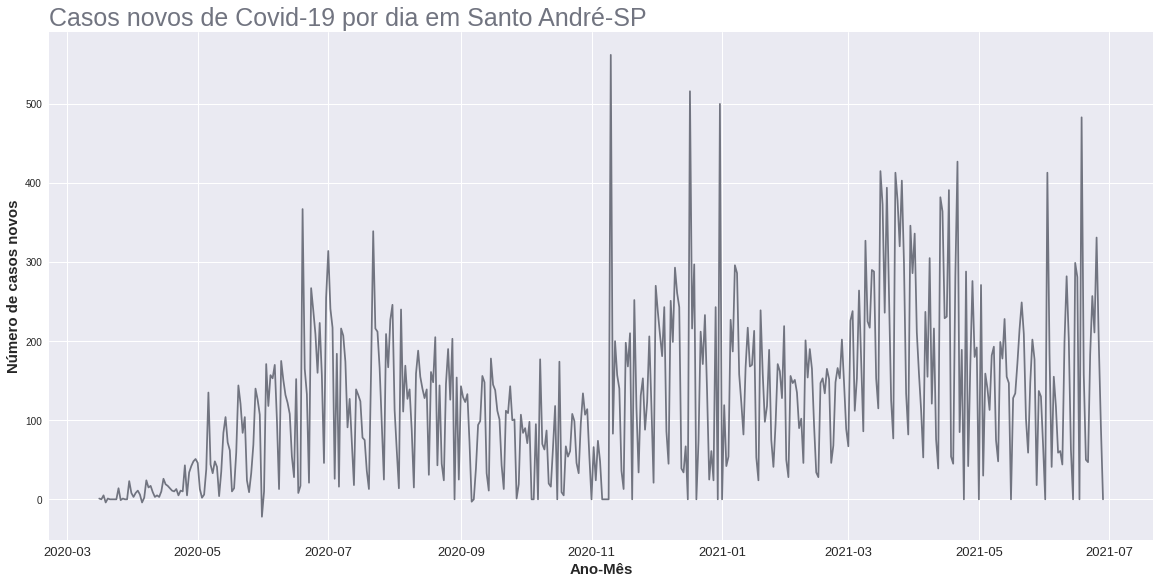

<Figure size 576x396 with 0 Axes>

In [9]:
# criando a figura, os eixos e definindo o tamanho da figura
fig, ax = plt.subplots(figsize = (16, 8), constrained_layout=True)

# plotando o gráfico e definindo os parâmetros visuais
sns.lineplot(data = dados_sa, x = dados_sa['data'], y = dados_sa['casos_novos'], color='#717480')
plt.title('Casos novos de Covid-19 por dia em Santo André-SP', fontsize = 25, color='#717480', loc='left')
plt.xlabel('Ano-Mês', fontsize=15, fontweight='bold')
plt.xticks(fontsize=13)
plt.ylabel('Número de casos novos', fontsize=15, fontweight='bold')

# visualizando a figura
plt.show()

# exportando a imagem
plt.savefig('casos_novos')

**Casos novos de Covid-19 através dos dias**

Nos **dados** alguns valores são **negativos**, isso indica uma **retificação** ao número de casos informados anteriormente.

É possível identificar alguns **períodos** onde o **número de casos diários aumenta significativamente**.

Podemos calcular a **taxa de crescimento** do número de **casos e óbitos** ao longo do tempo realizando a diferenciação dos dados de casos e óbitos novos. 

In [10]:
# calculando a taxa de crescimento para os casos e óbitos atraves da diferenciação
dados_sa['taxa_crescimento_casos'] = dados_sa['casos_novos'].diff()
dados_sa['taxa_crescimento_obitos'] = dados_sa['obitos_novos'].diff()

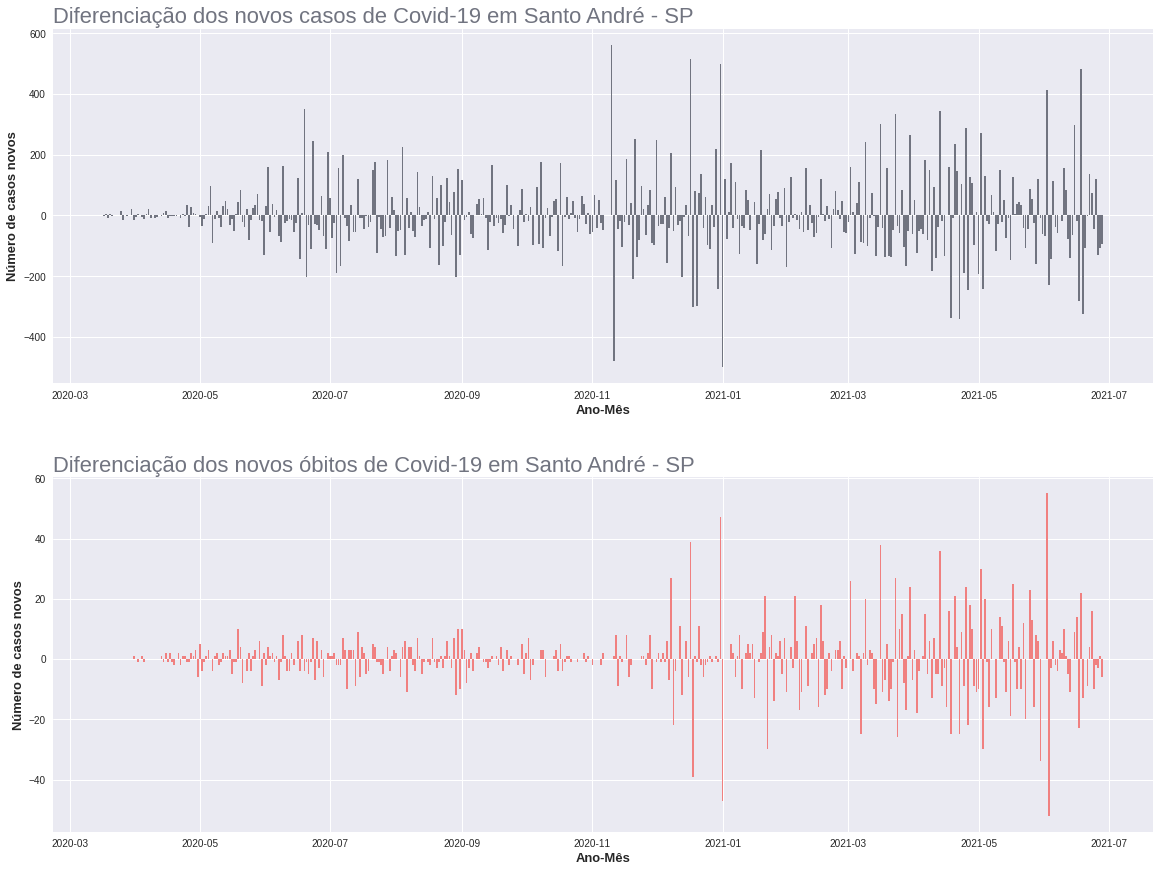

In [11]:
# plotando os gráficos com as taxas de crescimento para casos e óbitos

# criando a figura e os eixos
fig, ax = plt.subplots(2, figsize=(16, 12), constrained_layout=True)

# plotando o gráfico e definindo os parâmetros visuais
ax[0].bar(dados_sa['data'], dados_sa['taxa_crescimento_casos'], color='#717480')
ax[0].set_title('Diferenciação dos novos casos de Covid-19 em Santo André - SP', fontsize = 22, color='#717480', loc='left')
ax[0].set_xlabel('Ano-Mês', fontsize=13, fontweight='bold')
ax[0].set_ylabel('Número de casos novos', fontsize=13, fontweight='bold')

ax[1].bar(dados_sa['data'], dados_sa['taxa_crescimento_obitos'], color='lightcoral')
ax[1].set_title('\nDiferenciação dos novos óbitos de Covid-19 em Santo André - SP', fontsize = 22, color='#717480', loc='left')
ax[1].set_xlabel('Ano-Mês', fontsize=13, fontweight='bold')
ax[1].set_ylabel('Número de casos novos', fontsize=13, fontweight='bold')

plt.show()


**Taxa de crescimento verificada através da diferenciação do número de casos e óbitos novos**

Atráves da **visualização** da **diferenciação dos casos e óbitos novos** podemos identificar **picos**, **dias seguidos com valores altos ou baixos** e **mudanças na tendência**.

Com os dados de novos casos e óbitos também podemos calcular a **média móvel** para **casos** e **óbitos** ao longo do tempo. Neste projeto a **janela** da média móvel será de **7 dias**.

In [12]:
# calculando a média móvel para o número de casos e óbitos com janela de 7 dias
dados_sa['media_movel_casos'] = dados_sa['casos_novos'].rolling(window=7, center=False).mean()
dados_sa['media_movel_obitos'] = dados_sa['obitos_novos'].rolling(window=7, center=False).mean()

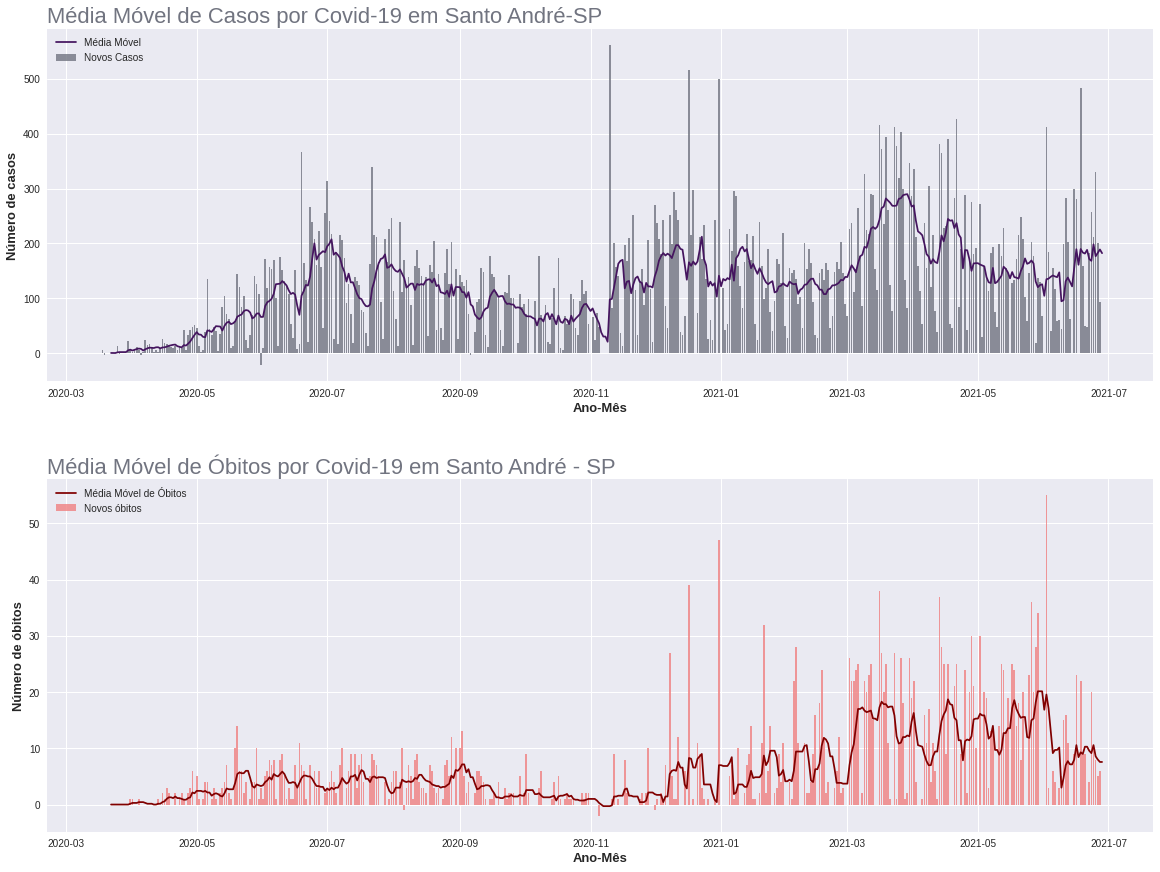

<Figure size 576x396 with 0 Axes>

In [13]:
#criando a figura e os eixos
fig, ax = plt.subplots(2, figsize=(16, 12), constrained_layout=True)

#plotando a o gráfico com a média móvel de casos e definindo parâmetros visuais
ax[0].bar(dados_sa['data'], dados_sa['casos_novos'], color='#717480', label='Novos Casos', alpha=0.8)
ax[0].plot(dados_sa['data'], dados_sa['media_movel_casos'], color='#45155f', label='Média Móvel')
ax[0].set_title('Média Móvel de Casos por Covid-19 em Santo André-SP', fontsize = 22, color='#717480', loc='left')
ax[0].set_xlabel('Ano-Mês', fontsize=13, fontweight='bold')
ax[0].set_ylabel('Número de casos', fontsize=13, fontweight='bold')

ax[0].legend(loc='upper left')

#plotando a média móvel dos óbitos e seus definindo parâmetros visuais
ax[1].bar(dados_sa['data'], dados_sa['obitos_novos'], color='lightcoral', label='Novos óbitos', alpha=0.8)
ax[1].plot(dados_sa['data'], dados_sa['media_movel_obitos'], color='maroon', label='Média Móvel de Óbitos')
ax[1].set_title('\nMédia Móvel de Óbitos por Covid-19 em Santo André - SP', fontsize = 22, color='#717480', loc='left')
ax[1].set_xlabel('Ano-Mês', fontsize=13, fontweight='bold')
ax[1].set_ylabel('Número de óbitos', fontsize=13, fontweight='bold')

ax[1].legend(loc='upper left')

plt.show()

# exportando a imagem
plt.savefig('media_movel_casos_obitos')

**Média móvel para os casos e óbitos de Covid-19**

No gráfico podemos identificar alguns **picos de casos e óbitos**, sendo eles em **julho e novembro de 2020** e também em **março de 2021**.

Observando os 2 gráficos é possível perceber uma **relação entre os casos e óbitos**. Quanto maior os número de casos, maior o número de óbitos.

É possível verificar essa **relação entre as 2 variáveis através de um gráfico de correlação**, como veremos abaixo.

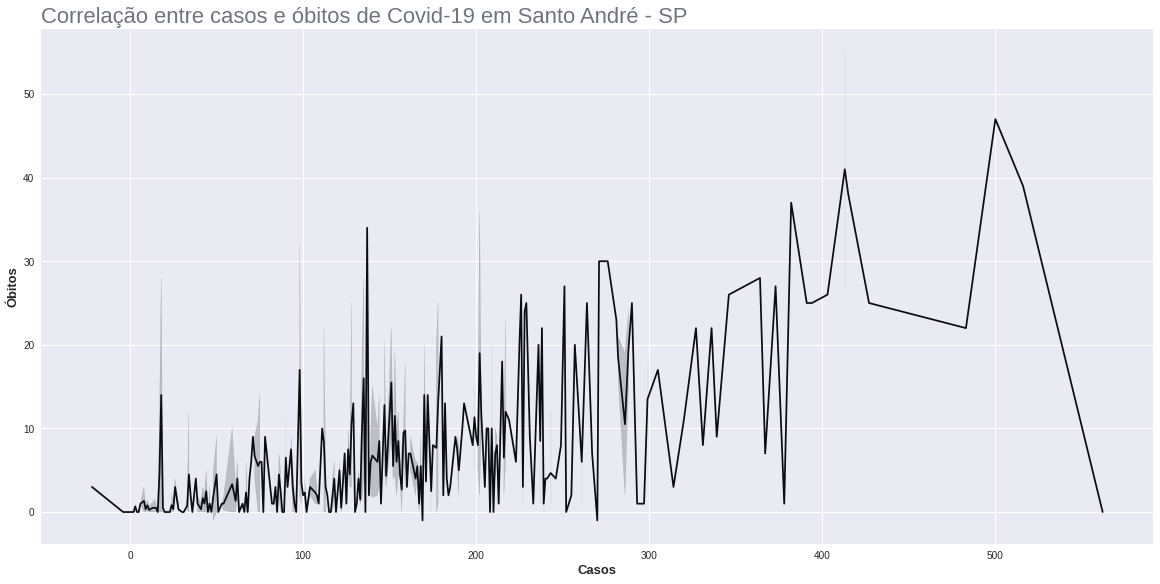

In [14]:
# criando a figura e os eixos
fig, ax = plt.subplots(figsize=(16, 8), constrained_layout=True)

#plotando o gráfico da correlação entre o número de casos e óbitos novos de Covid-19
sns.lineplot(data=dados_sa, x='casos_novos', y='obitos_novos', color='#0c0c12')
plt.title('Correlação entre casos e óbitos de Covid-19 em Santo André - SP', fontsize = 22, color='#717480', loc='left')
plt.xlabel('Casos', fontsize=13, fontweight='bold')
plt.ylabel('Óbitos', fontsize=13, fontweight='bold')

plt.show()

**Correlação entre o número de novos casos e óbitos confirmados de Covid-19**

No gráfico acima é possível perceber que **conforme o número de casos aumentam o número de óbitos também aumenta**. Gerando assim uma **correlação**, já imaginada, entre o **número de casos e os óbitos**.

A base de dados analisada contém informações do número de casos de Covid-19. Será que a informação sobre esses casos segue alguma **sazonalidade**? Os dados informados segue um padrão para todos os dias ou existe uma diferença entre eles? Vamos verificar abaixo.

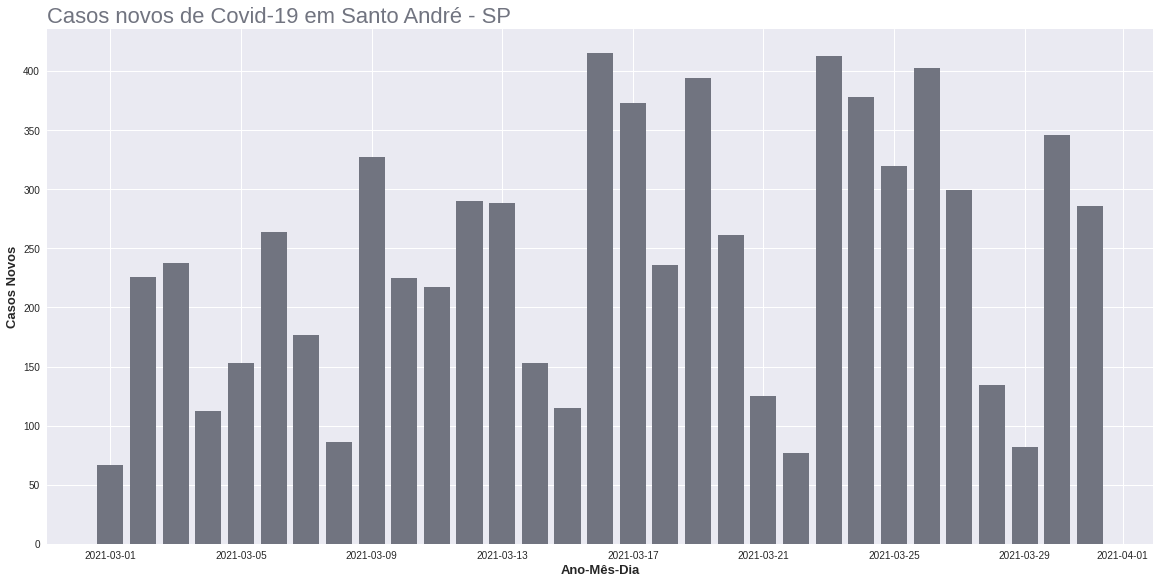

<Figure size 576x396 with 0 Axes>

In [15]:
# separando os dados de 2021 em nossa base de dados
dados_sa['ano'] = dados_sa['data'].dt.year
dados_sa['mes'] = dados_sa['data'].dt.month

# separando os dados referentes a 2021
dados_mar_2021 = dados_sa.query("ano == 2021 and mes == 3")

# plotando o gráfico com os dados de 2021 para novos casos
fig, ax = plt.subplots(figsize = (16, 8), constrained_layout=True)

# plotando gráfico com os casos diários e seus parâmetros visuais
plt.bar(dados_mar_2021['data'], dados_mar_2021['casos_novos'], color='#717480')
plt.title('Casos novos de Covid-19 em Santo André - SP', fontsize = 22, color='#717480', loc='left')
plt.xlabel('Ano-Mês-Dia', fontsize=13, fontweight='bold')
plt.ylabel('Casos Novos', fontsize=13, fontweight='bold')

plt.show()

# exportando a imagem
plt.savefig('sazonalidade')

**Gráfico com o número de casos novos diários para o mês de março de 2021**

No gráfico acima podemos ver que ao longo do tempo o **padrão de novos casos de Covid-19 informados se repete**. São **5 dias com um alto número de novos casos** seguidos por **2 dias em que esse número diminui**, fechando assim o ciclo de uma semana (7 dias). Isso pode indicar uma **sazonalidade semanal** nos dados.

Para confirmar essa **sazonalidade** podemos plotar um gráfico de **autocorrelação** através do próprio Pandas.

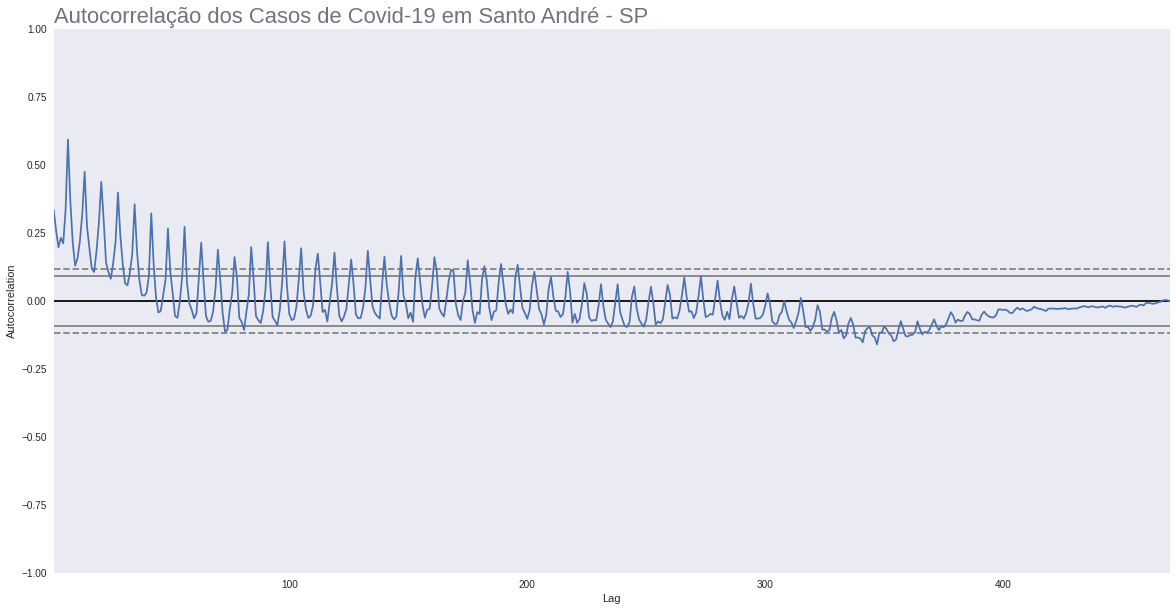

In [16]:
# importando módulo do Pandas que será utilizado
from pandas.plotting import autocorrelation_plot

# importando o matplotlib para manipular a imagem
import matplotlib as mpl
import matplotlib.pyplot as plt

# definindo o tamanho da imagem e fonte a ser gerada
mpl.rcParams['figure.figsize'] = (20, 10)
mpl.rcParams['font.size'] = 15

# gerando o gráfico para verificar a autocorrelação dos dados de novos casos
autocorrelation_plot(dados_sa['casos_novos']).set_title('Autocorrelação dos Casos de Covid-19 em Santo André - SP',
                                                        fontsize = 22, color='#717480', loc='left')
plt.show()

**Gráfico de autocorrelação dos casos de Covid-19**

A esquerda do gráfico podemos notar uma **correlação acima de 0.5** dos nossos dados naquele momento no tempo. Movendo nossos dados através do tempo vemos que essa correlação diminui, chegando próximo a 0 a direita do gráfico.

Como temos dados que são relacionáveis com o tempo, temos uma **Série Temporal**.

**Hipótese 1 confirmada**. Temos uma série temporal nos nossos dados.

Sendo assim, é possível **identificar tendências** e talvez realizar uma **previsão** com base nos padrões identificados.

Utilizando a biblioteca **Prophet** do Facebook buscaremos a criação de um **modelo** que consiga prever dados de casos de Covid-19. Isso será realizado [AQUI](https://github.com/EltonGS/BC_DS_projeto_modulo_3/blob/main/Notebooks/modelo_prophet.ipynb).

## **A seguir analisaremos os dados para verificar a hipótese 2 - As medidas de isolamento social (lockdown, antecipação de feriados) mais restritivas realizadas pela prefeitura / estado surtiram efeito?**

Primeiramente precisamos identificar os **períodos onde as medidas de isolamento social mais restritivas foram implementadas**.

No ano de 2020 a cidade de Santo André seguiu as determinações feitas pelo governo do estado de São Paulo. Para o período de **6/03/2020 a 11/4/2020** somente os serviços essenciais estavam autorizados a funcionar.

Em 2021 a prefeitura adiantou feriados de junho e julho para o período entre **29/03/2021 e 02/04/2021**.

**Fontes**:

[Diário do Transponte](https://diariodotransporte.com.br/2020/05/19/quatro-cidades-do-abc-paulista-decretam-antecipacao-do-feriado-de-corpus-christi-e-tres-aguardam-aprovacao-do-legislativo/)

[Folha](https://agora.folha.uol.com.br/sao-paulo/2021/03/veja-como-ficam-os-feriados-antecipados-nas-cidades-do-abc.shtml)

Para verificar se essas medidas surtiram efeitos serão analisadas as **médias móveis de casos e óbitos** antes de as medidas serem implementadas e também 30 dias após. 

Relembrando, as medias móveis para casos e óbitos estão abaixo.

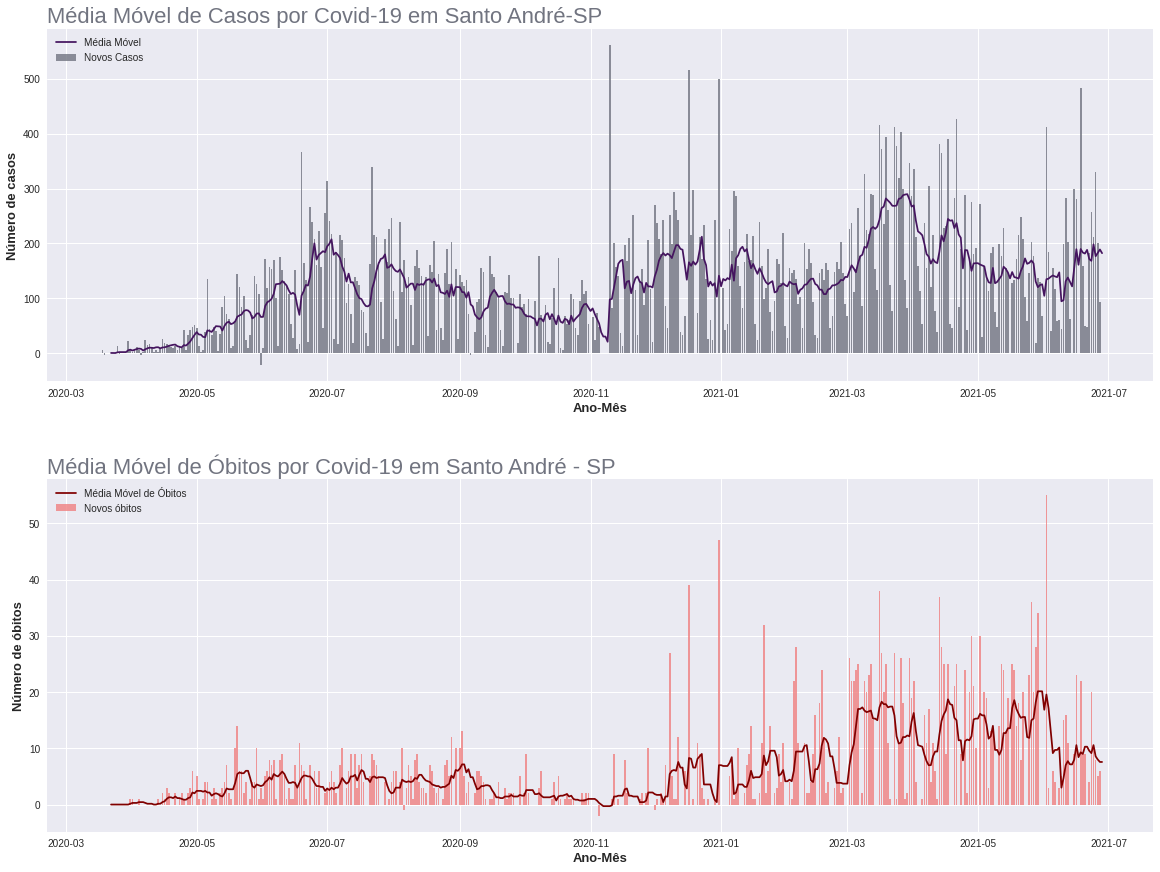

In [17]:
#criando a figura e os eixos
fig, ax = plt.subplots(2, figsize=(16, 12), constrained_layout=True)

#plotando a o gráfico com a média móvel de casos e definindo parâmetros visuais
ax[0].bar(dados_sa['data'], dados_sa['casos_novos'], color='#717480', label='Novos Casos', alpha=0.8)
ax[0].plot(dados_sa['data'], dados_sa['media_movel_casos'], color='#45155f', label='Média Móvel')
ax[0].set_title('Média Móvel de Casos por Covid-19 em Santo André-SP', fontsize = 22, color='#717480', loc='left')
ax[0].set_xlabel('Ano-Mês', fontsize=13, fontweight='bold')
ax[0].set_ylabel('Número de casos', fontsize=13, fontweight='bold')

ax[0].legend(loc='upper left')

#plotando a média móvel dos óbitos e seus definindo parâmetros visuais
ax[1].bar(dados_sa['data'], dados_sa['obitos_novos'], color='lightcoral', label='Novos óbitos', alpha=0.8)
ax[1].plot(dados_sa['data'], dados_sa['media_movel_obitos'], color='maroon', label='Média Móvel de Óbitos')
ax[1].set_title('\nMédia Móvel de Óbitos por Covid-19 em Santo André - SP', fontsize = 22, color='#717480', loc='left')
ax[1].set_xlabel('Ano-Mês', fontsize=13, fontweight='bold')
ax[1].set_ylabel('Número de óbitos', fontsize=13, fontweight='bold')

ax[1].legend(loc='upper left')

plt.show()

Acima temos as médias móveis para novos casos e óbitos de Covid-19 para Santo André.

Para identificar os períodos quando as medidas foram implementadas é necessário identificar as datas nos dados.

In [18]:
# identificação das datas de 2020 no dataframe
medidas_2020 = (dados_sa['data'] >= '2020-03-06') & (dados_sa['data'] <= '2020-04-11')

# extração os dados até julho de 2020
dados_lockdown_2020 = (dados_sa['data'] < '2020-05-22')

In [19]:
# identificação das datas de 2021 no dataframe
antec_feriado_2021 = (dados_sa['data'] >= '2021-03-29') & (dados_sa['data'] <= '2021-04-02')

# extração os dados até maio de 2021
dados_lockdown_2021 = (dados_sa['data'] < '2021-05-01') & (dados_sa['data'] >= '2021-03-15')

In [20]:
# criando os dataframe com as informações dos períodos identificados
# para o ano de 2020
periodo_2020 = dados_sa.loc[medidas_2020]
dados_2020 = dados_sa.loc[dados_lockdown_2020]

# para o ano de 2021
feriados_2021 = dados_sa.loc[antec_feriado_2021]
dados_2021 = dados_sa.loc[dados_lockdown_2021]

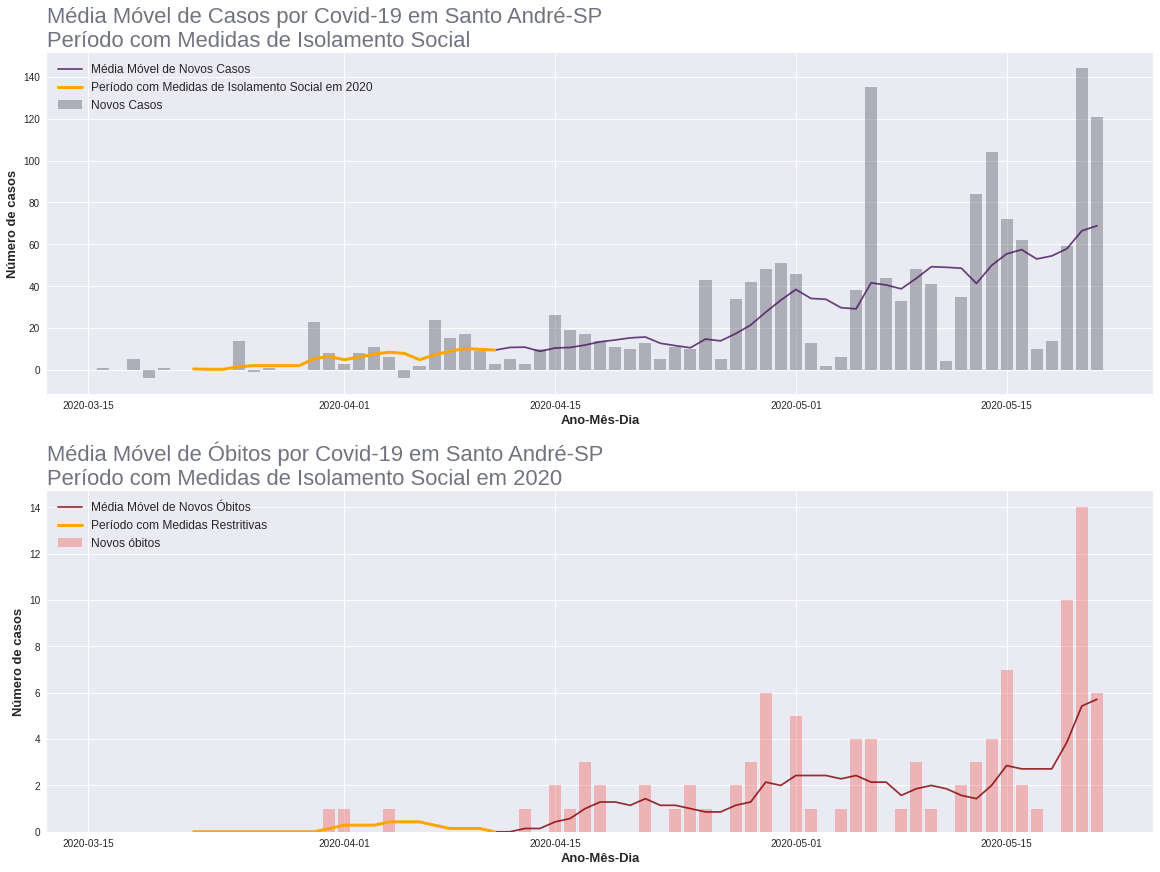

<Figure size 1440x720 with 0 Axes>

In [21]:
#criando a figura e os eixos
fig, ax = plt.subplots(2, figsize=(16, 12), constrained_layout=True)

#plotando a média móvel de casos
ax[0].bar(dados_2020['data'], dados_2020['casos_novos'], color='#717480', label='Novos Casos', alpha=0.5)
ax[0].plot(dados_2020['data'], dados_2020['media_movel_casos'], color='#45155f', label='Média Móvel de Novos Casos', alpha=0.8)
ax[0].plot(periodo_2020['data'], periodo_2020['media_movel_casos'], color='orange', label='Período com Medidas de Isolamento Social em 2020', lw=3)

# definindo título e os labels nos eixos X e Y
ax[0].set_title('Média Móvel de Casos por Covid-19 em Santo André-SP\nPeríodo com Medidas de Isolamento Social', fontsize = 22, color='#717480', loc='left')
ax[0].set_xlabel('Ano-Mês-Dia', fontsize=13, fontweight='bold')
ax[0].set_ylabel('Número de casos', fontsize=13, fontweight='bold')

# definições da legenda
ax[0].legend(loc='upper left', fontsize=12)

#plotando a média móvel dos óbitos
ax[1].bar(dados_2020['data'], dados_2020['obitos_novos'], color='lightcoral', label='Novos óbitos', alpha=0.5)
ax[1].plot(dados_2020['data'], dados_2020['media_movel_obitos'], color='maroon', label='Média Móvel de Novos Óbitos', alpha=0.8)
ax[1].plot(periodo_2020['data'], periodo_2020['media_movel_obitos'], color='orange', label='Período com Medidas Restritivas', lw=3)

# definindo título e os labels nos eixos X e Y
ax[1].set_title('Média Móvel de Óbitos por Covid-19 em Santo André-SP\nPeríodo com Medidas de Isolamento Social em 2020', fontsize = 22, color='#717480', loc='left')
ax[1].set_xlabel('Ano-Mês-Dia', fontsize=13, fontweight='bold')
ax[1].set_ylabel('Número de casos', fontsize=13, fontweight='bold')

# definições da legenda
ax[1].legend(loc='upper left', fontsize=12)

plt.show()

# exportando a figura
plt.savefig('isolamento_2020')

**Gráfico com as médias móveis de casos e óbitos no periodo de 2020 onde a prefeitura decretou fechamento de todo serviço não essencial**

É possível ver que após as medidas de isolamento social a **média móvel de casos e óbitos aumentou**. Para identificar o porquê das medidas não surtirem efeito em Santo André é necessário analisar os dados de adesão da população as medidas de isolamento social.

Vejamos agora os dados referentes ao **adiantamento de feriados** feito pela prefeitura no ano de **2021**.

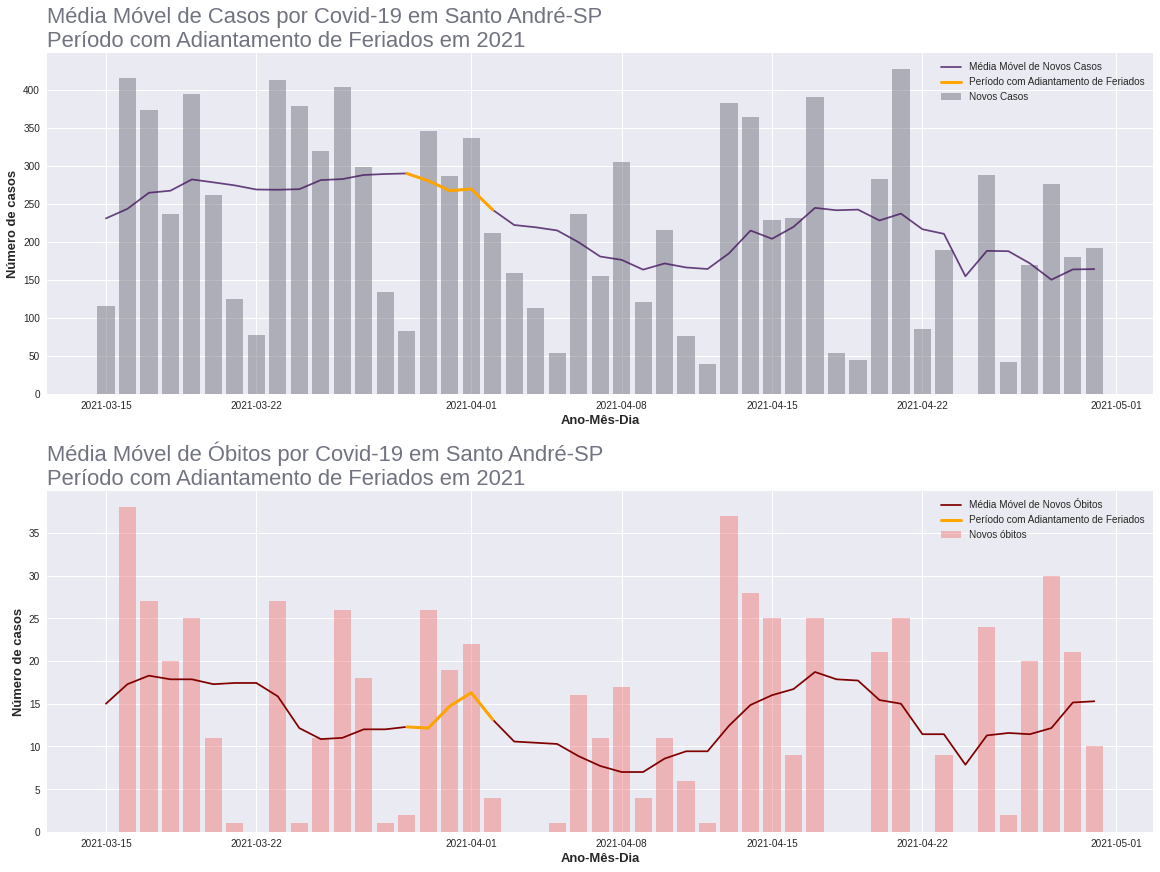

<Figure size 1440x720 with 0 Axes>

In [22]:
#criando a figura e os eixos
fig, ax = plt.subplots(2, figsize=(16, 12), constrained_layout=True)

#plotando a média móvel de casos
ax[0].bar(dados_2021['data'], dados_2021['casos_novos'], color='#717480', label='Novos Casos', alpha=0.5)
ax[0].plot(dados_2021['data'], dados_2021['media_movel_casos'], color='#45155f', label='Média Móvel de Novos Casos', alpha=0.8)
ax[0].plot(feriados_2021['data'], feriados_2021['media_movel_casos'], color='orange', label='Período com Adiantamento de Feriados', lw=3)

# definindo título e os labels nos eixos X e Y
ax[0].set_title('Média Móvel de Casos por Covid-19 em Santo André-SP\nPeríodo com Adiantamento de Feriados em 2021', fontsize = 22, color='#717480', loc='left')
ax[0].set_xlabel('Ano-Mês-Dia', fontsize=13, fontweight='bold')
ax[0].set_ylabel('Número de casos', fontsize=13, fontweight='bold')

ax[0].legend(loc='upper right', fontsize=10)

#plotando a média móvel dos óbitos
ax[1].bar(dados_2021['data'], dados_2021['obitos_novos'], color='lightcoral', label='Novos óbitos', alpha=0.5)
ax[1].plot(dados_2021['data'], dados_2021['media_movel_obitos'], color='maroon', label='Média Móvel de Novos Óbitos')
ax[1].plot(feriados_2021['data'], feriados_2021['media_movel_obitos'], color='orange', label='Período com Adiantamento de Feriados', lw=3)

ax[1].set_title('Média Móvel de Óbitos por Covid-19 em Santo André-SP\nPeríodo com Adiantamento de Feriados em 2021', fontsize = 22, color='#717480', loc='left')
ax[1].set_xlabel('Ano-Mês-Dia', fontsize=13, fontweight='bold')
ax[1].set_ylabel('Número de casos', fontsize=13, fontweight='bold')

ax[1].legend(loc='upper right', fontsize=10)

plt.show()

# exportando a figura
plt.savefig('adiantamento_feriados_2021')

**Gráfico com as médias de casos e óbitos de Covid-19 após as medidas restritivas adotadas pela prefeitura**

Vemos no gráfico acima que **imediatamente após as medidas restritivas** temos uma **queda no número de casos e óbitos** e, aproximadamente, 14 dias depois aumentam novamente. Como os **novos casos e óbitos de Covid-19 surgem após alguns dias** do contágio, **não é possível relacionar a queda** nos números de casos observadas nos dados ao **adiantamento dos feriados**.

Com base nessa informação é possível afirmar, com esses dados, que a **hipótese 2 é falsa**. As **medidas de isolamento social adotadas pela prefeitura / estado não reduziram os casos e óbitos de Covid-19**.

## **Hipótese 3 - A vacinação diminuiu o número de casos e óbitos por Covid-19**

A vacinação na cidade de Santo André iniciou em 19 de janeiro de 2021. Fonte: [Fundação do ABC](https://fuabc.org.br/noticias/santo-andre-chega-a-marca-de-100-mil-vacinados-contra-covid-19-no-aniversario-da-cidade/)

Para verificarmos os dados após esse período será necessário separar os dados em nosso dataframe.

In [23]:
# identificação dos dados após o início da vacinação
vacinacao = dados_sa.query("data >= '2021-01-19'")

# dados de janeiro em diante
pos_vacina = dados_sa.query("data >= '2021-01-01'")

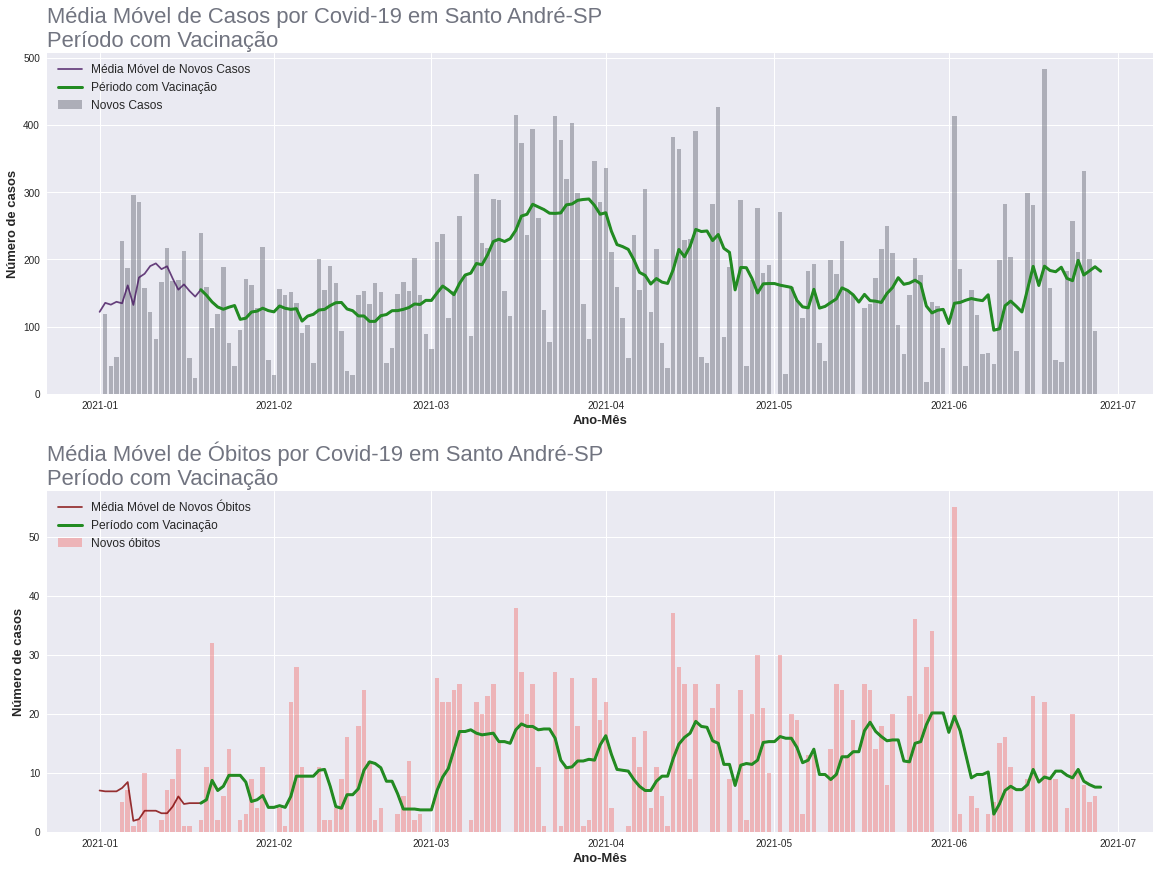

In [24]:
# plotando os gráficos com as informações da vacinação
#criando a figura e os eixos
fig, ax = plt.subplots(2, figsize=(16, 12), constrained_layout=True)

#plotando a média móvel de casos
ax[0].bar(pos_vacina['data'], pos_vacina['casos_novos'], color='#717480', label='Novos Casos', alpha=0.5)
ax[0].plot(pos_vacina['data'], pos_vacina['media_movel_casos'], color='#45155f', label='Média Móvel de Novos Casos', alpha=0.8)
ax[0].plot(vacinacao['data'], vacinacao['media_movel_casos'], color='forestgreen', label='Périodo com Vacinação', lw=3)

# definição de título e os labels nos eixos X e Y
ax[0].set_title('Média Móvel de Casos por Covid-19 em Santo André-SP\nPeríodo com Vacinação', fontsize = 22, color='#717480', loc='left')
ax[0].set_xlabel('Ano-Mês', fontsize=13, fontweight='bold')
ax[0].set_ylabel('Número de casos', fontsize=13, fontweight='bold')

# definiçaõ da legenda
ax[0].legend(loc='upper left', fontsize=12)

#plotando a média móvel dos óbitos
ax[1].bar(pos_vacina['data'], pos_vacina['obitos_novos'], color='lightcoral', label='Novos óbitos', alpha=0.5)
ax[1].plot(pos_vacina['data'], pos_vacina['media_movel_obitos'], color='maroon', label='Média Móvel de Novos Óbitos', alpha=0.8,)
ax[1].plot(vacinacao['data'], vacinacao['media_movel_obitos'], color='forestgreen', label='Período com Vacinação', lw=3)

# definição de título e os labels nos eixos X e Y
ax[1].set_title('Média Móvel de Óbitos por Covid-19 em Santo André-SP\nPeríodo com Vacinação', fontsize = 22, color='#717480', loc='left')
ax[1].set_xlabel('Ano-Mês', fontsize=13, fontweight='bold')
ax[1].set_ylabel('Número de casos', fontsize=13, fontweight='bold')

# definição da legenda
ax[1].legend(loc='upper left', fontsize=12)

# exportando a figura
plt.savefig('vacinacao')

**Gráfico com a média móvel de casos e óbitos após o início da vacinação contra Covid-19**

Os dados demonstram que há um **aumento no número de casos e óbitos por Covid-19 após o início da vacinação na cidade de Santo André**. Esse aumento pode estar relacionado com o relaxamento nas medidas de isolamento social após o início da vacinação, com isso as pessoas estão se movendo mais na cidade para ir ao trabalho ou mesmo para outras atividades como lazer e compras.

**Com base nesses dados é possível concluir que a hipótese 3 é falsa. A vacinação não diminuiu o número de casos e óbitos por Covid-19.**

## **Conclusões**

- Os dados analisados nesse projeto são uma série temporal com uma sazonalidade semanal;

- Em Santo André tivemos picos de casos e óbitos de Covid-19 em julho e novembro de 2020 e também em março de 2021;

- As medidas de isolamento social adotadas pela prefeitura de Santo André não reduziu o número de casos e óbitos por Covid-19;

- A vacinação não reduziu o número de casos e óbitos por Covid-19;

## **Considerações Finais**

Para identificar as razões para as medidas de isolamento social e a vacinação não reduzirem o número de casos e óbitos por Covid-19 será necessário analisar os dados referentes ao deslocamento da população durante esses períodos. Esses dados não foram analisados nesse projeto.

Algumas razões para essas medidas não surtirem o efeito desejado podem ser:

- A descrença sobre as medidas de isolamento social;
- A necessidade das pessoas trabalharem e assim necessitam se deslocar diariamente;
- A ocorrência de festas e aglomerações ilegais;
- Relaxamento sobre as medidas de isolamento social quando ocorre uma baixa nos casos e óbitos;

Esses itens podem ser considerados ao continuar a análise iniciada nesse projeto.

## **Modelo de Previsão com Facebook Prophet**

Continuando esse projeto será criado um **modelo de previsão** para a série temporal utilizando a biblioteca **Facebook Prophet**. Esse notebook pode ser acessado [aqui](https://github.com/EltonGS/BC_DS_projeto_modulo_3/blob/main/Notebooks/modelo_prophet.ipynb).